In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
# loan status has 2 classes, making it a classification problem. and dropping the not imapctful columns

In [9]:
df.drop("Loan_ID",axis=1,inplace=True)

In [11]:
for i in df.columns:
    print('\n','                         ')
    print(df[i].value_counts())


                          
Male      489
Female    112
Name: Gender, dtype: int64

                          
Yes    398
No     213
Name: Married, dtype: int64

                          
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

                          
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

                          
No     500
Yes     82
Name: Self_Employed, dtype: int64

                          
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

                          
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

                          
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
16

In [12]:
#dataset is slightly imbalanced
df.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
#checking the numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [15]:
print(df.isnull().sum())


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<AxesSubplot:>

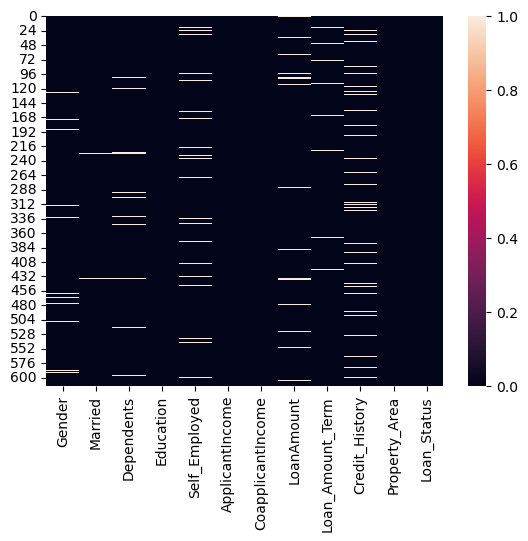

In [16]:
sns.heatmap(df.isnull())

In [17]:
#we have null values in both the categorical and numerical columns, hence will impute the null values accordingly

In [18]:
#Imputation
#Imputing the categorical values with the mode of the respective columns

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


#Filling the numerical column with the median of the respective column
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())


In [19]:
print(df.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

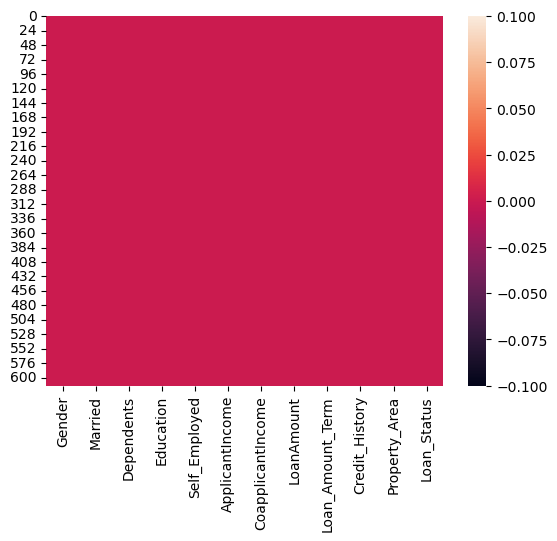

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
#The summary of this dataset looks perfect since there is no negative/ invalid values present.

Y    422
N    192
Name: Loan_Status, dtype: int64


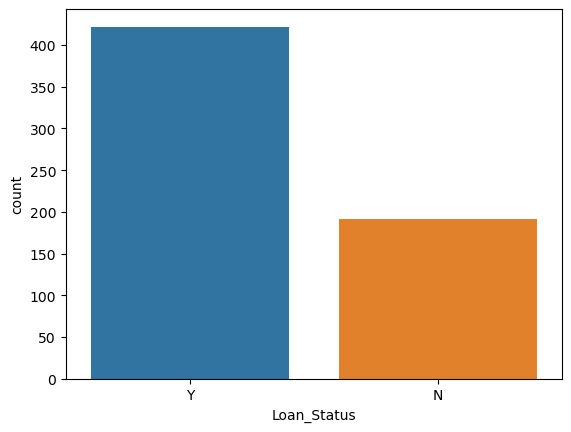

In [23]:
#DataVisualization
#Univariate Analysis
#lebel
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

In [24]:
cat_col


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Male      502
Female    112
Name: Gender, dtype: int64


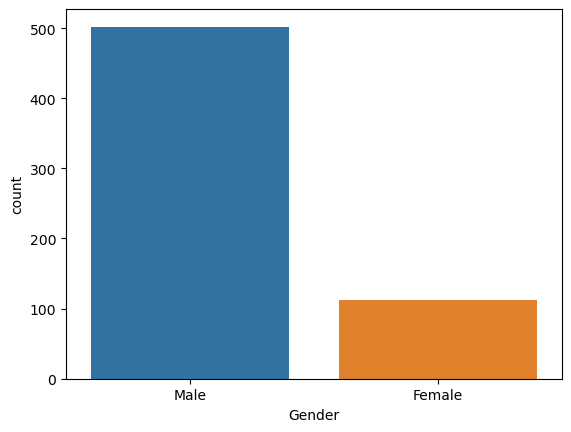

In [25]:
#Categorical columns
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


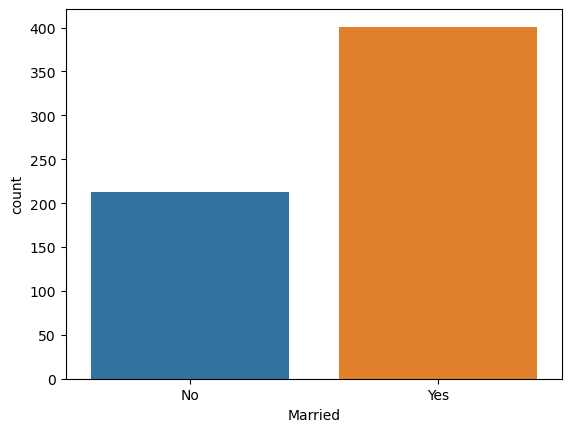

In [26]:
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


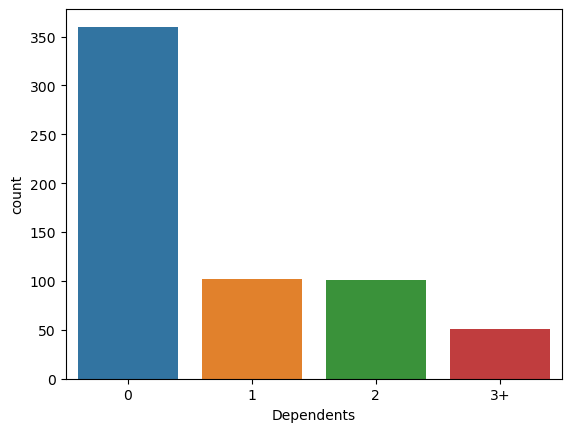

In [27]:
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


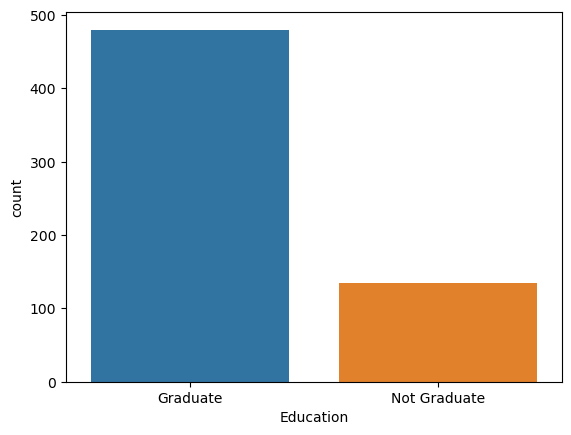

In [28]:
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


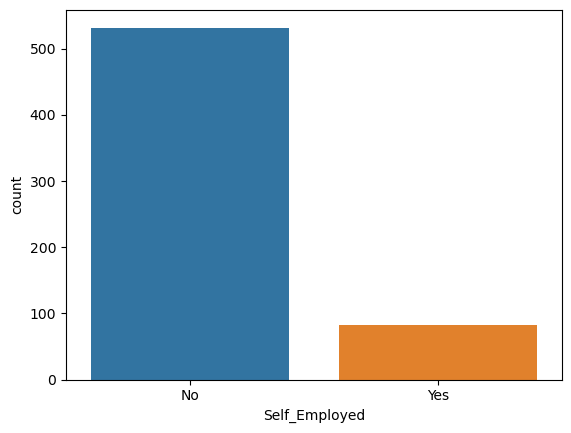

In [29]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


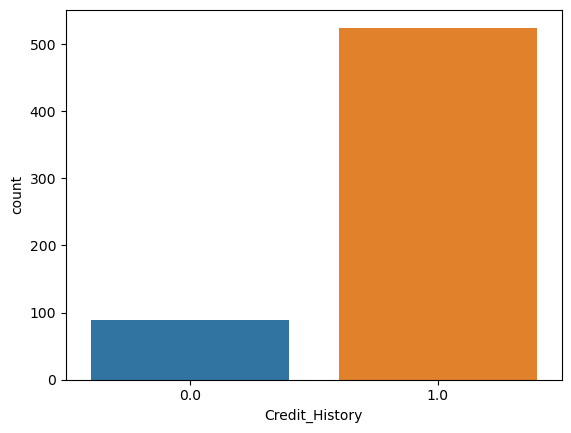

In [30]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

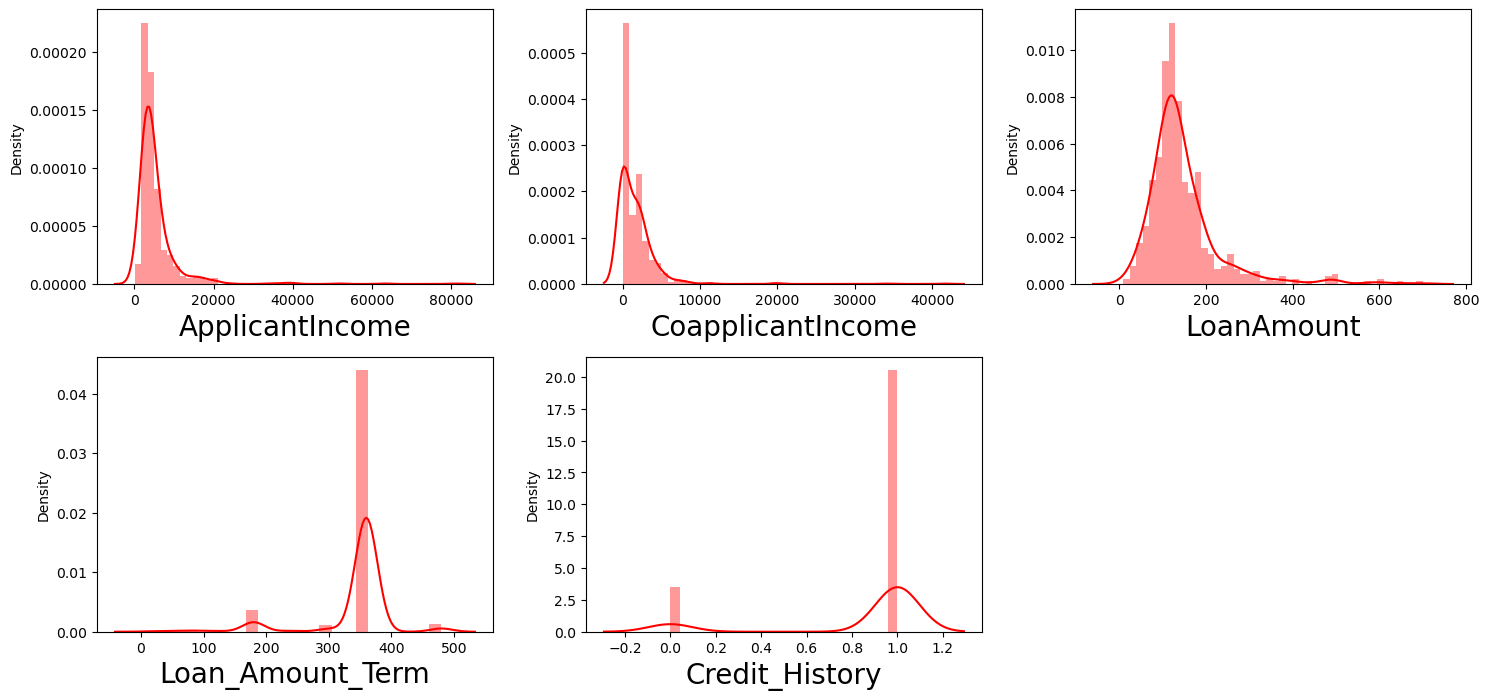

In [32]:
#visulization of numerical columns
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

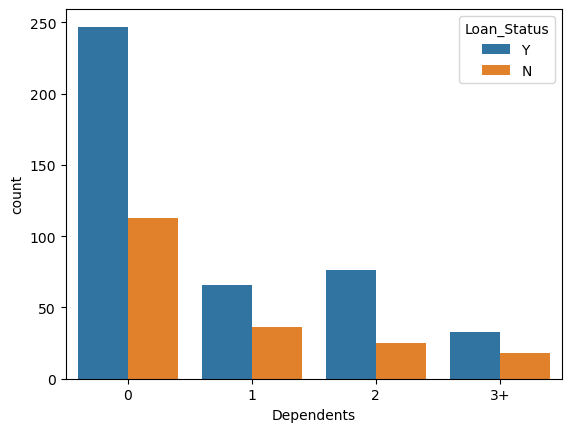

In [33]:
# dataset is not normally distributed.
#Bivariate Analysis
#(Checking the relation between the features and target)
#Visualizing count of Dependents of the applicants on the basis of loan status
sns.countplot(df["Dependents"],hue=df["Loan_Status"])
plt.show()

In [34]:
#The applicants who have dependents 0 are more likely to get their loan approved.



Graduate        480
Not Graduate    134
Name: Education, dtype: int64


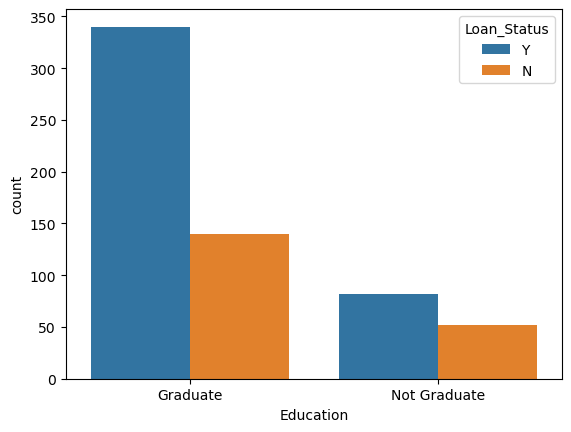

In [36]:
print(df["Education"].value_counts())
sns.countplot(df["Education"],hue=df["Loan_Status"])
plt.show()
#Graduated populatuion number is higher as loan applicants



No     532
Yes     82
Name: Self_Employed, dtype: int64


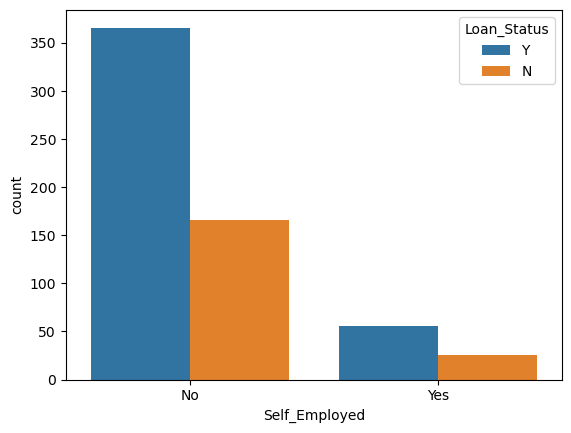

In [38]:
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"])
plt.show()
#The applicants who are not self employed have the tendancy of getting their loans than self employed applicants.



1.0    525
0.0     89
Name: Credit_History, dtype: int64


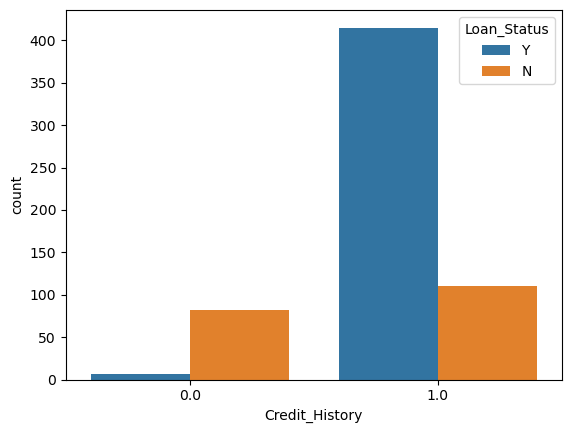

In [39]:
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"], hue=df["Loan_Status"])
plt.show()
#The applicants who have credit history 1 have got their loan approval which means they have cleared their past loans.



Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


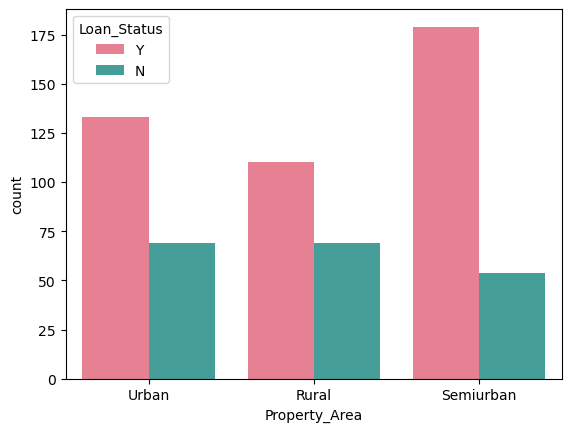

In [40]:
print(df["Property_Area"].value_counts())
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="husl")
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


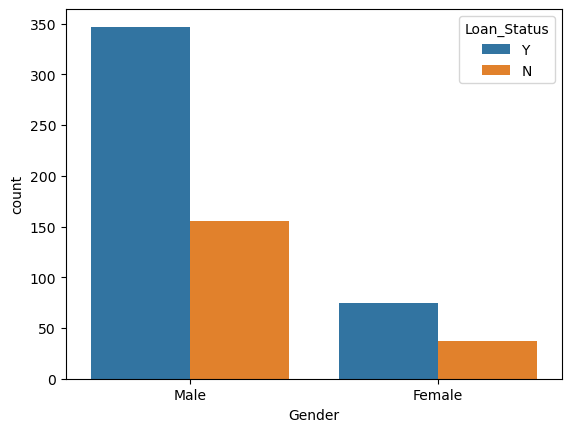

In [42]:
print(df["Gender"].value_counts())
sns.countplot(df["Gender"],hue=df["Loan_Status"])
plt.show()
#The male applicants who have applied for the loan have got approved compared to the female applicants.



Yes    401
No     213
Name: Married, dtype: int64


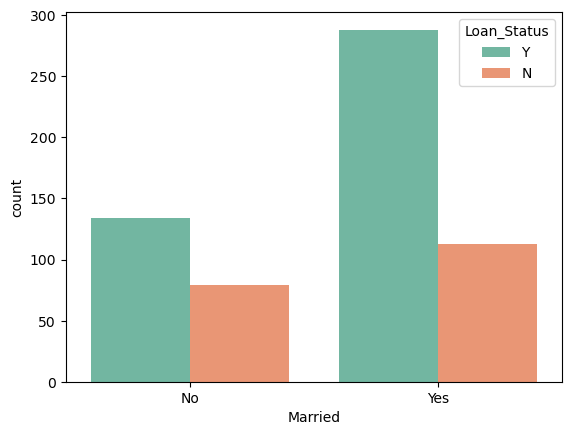

In [43]:
print(df["Married"].value_counts())
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Set2")
plt.show()
#The loan status approved is higher for the married group



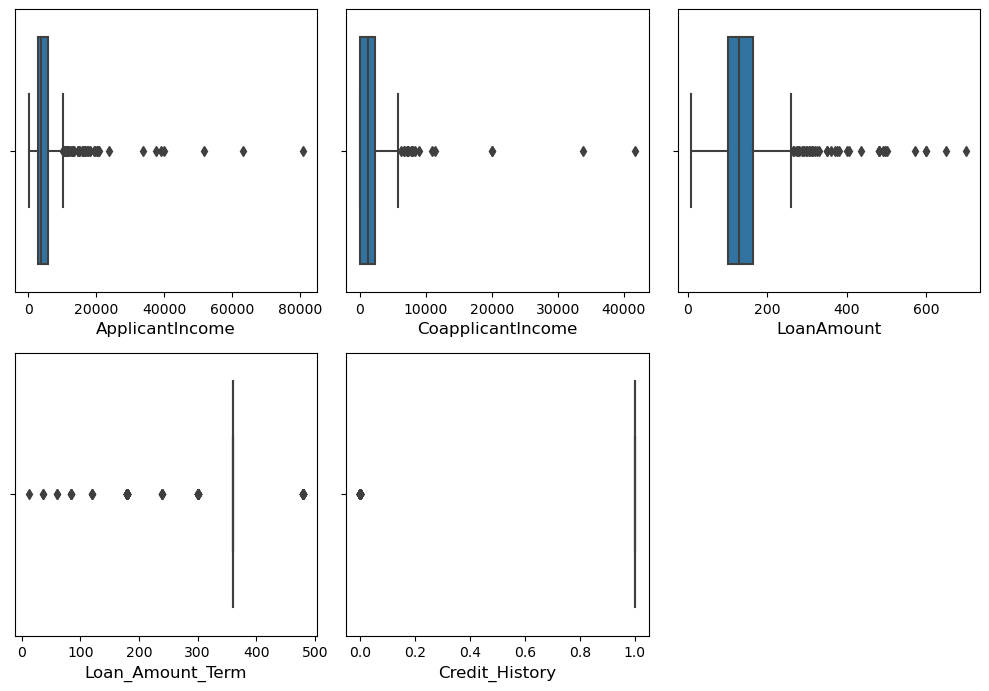

In [45]:
#Identifying the outlier
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()
#all the columns have outliers, we will be required to remove it

In [46]:
#Removing the outliers
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [48]:
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
df.shape


(614, 12)

In [50]:
new_df.shape


(577, 12)

In [52]:
new_df.skew().sort_values()
#need to remove skewness which is presents in all columns

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
LoanAmount           1.151525
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
dtype: float64

In [59]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''



"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [60]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [61]:
new_df.skew().sort_values()


Loan_Amount_Term    -2.098806
Credit_History      -1.976043
CoapplicantIncome   -0.191876
ApplicantIncome      0.027981
LoanAmount           0.048425
dtype: float64

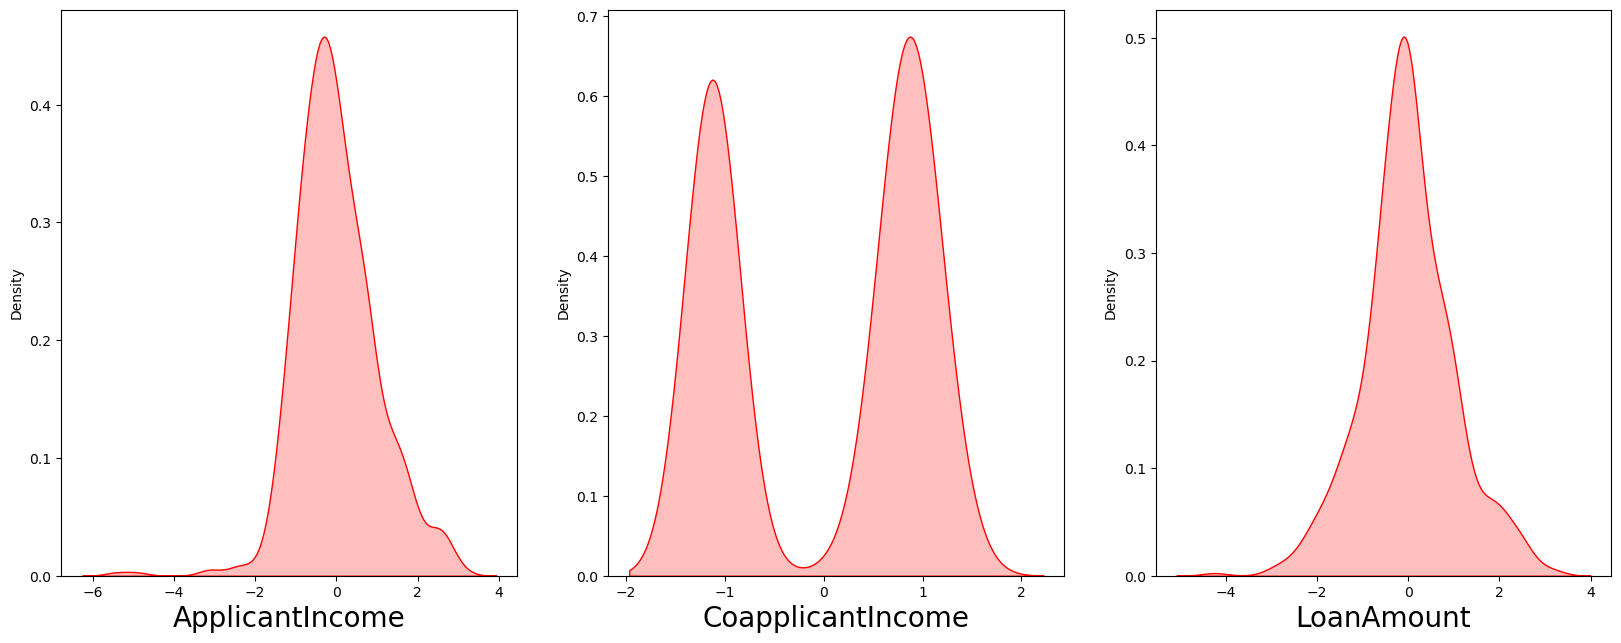

In [65]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='red',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
#skewness has been removed and the dataset looks normal

In [66]:
#Encoding by Label Encoder
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [68]:
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]
#categorical values has been encoded

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [69]:
#Co-relation
corr=new_df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Married'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Self_Employed'),
  Text(0, 5.5, 'ApplicantIncome'),
  Text(0, 6.5, 'CoapplicantIncome'),
  Text(0, 7.5, 'LoanAmount'),
  Text(0, 8.5, 'Loan_Amount_Term'),
  Text(0, 9.5, 'Credit_History'),
  Text(0, 10.5, 'Property_Area'),
  Text(0, 11.5, 'Loan_Status')])

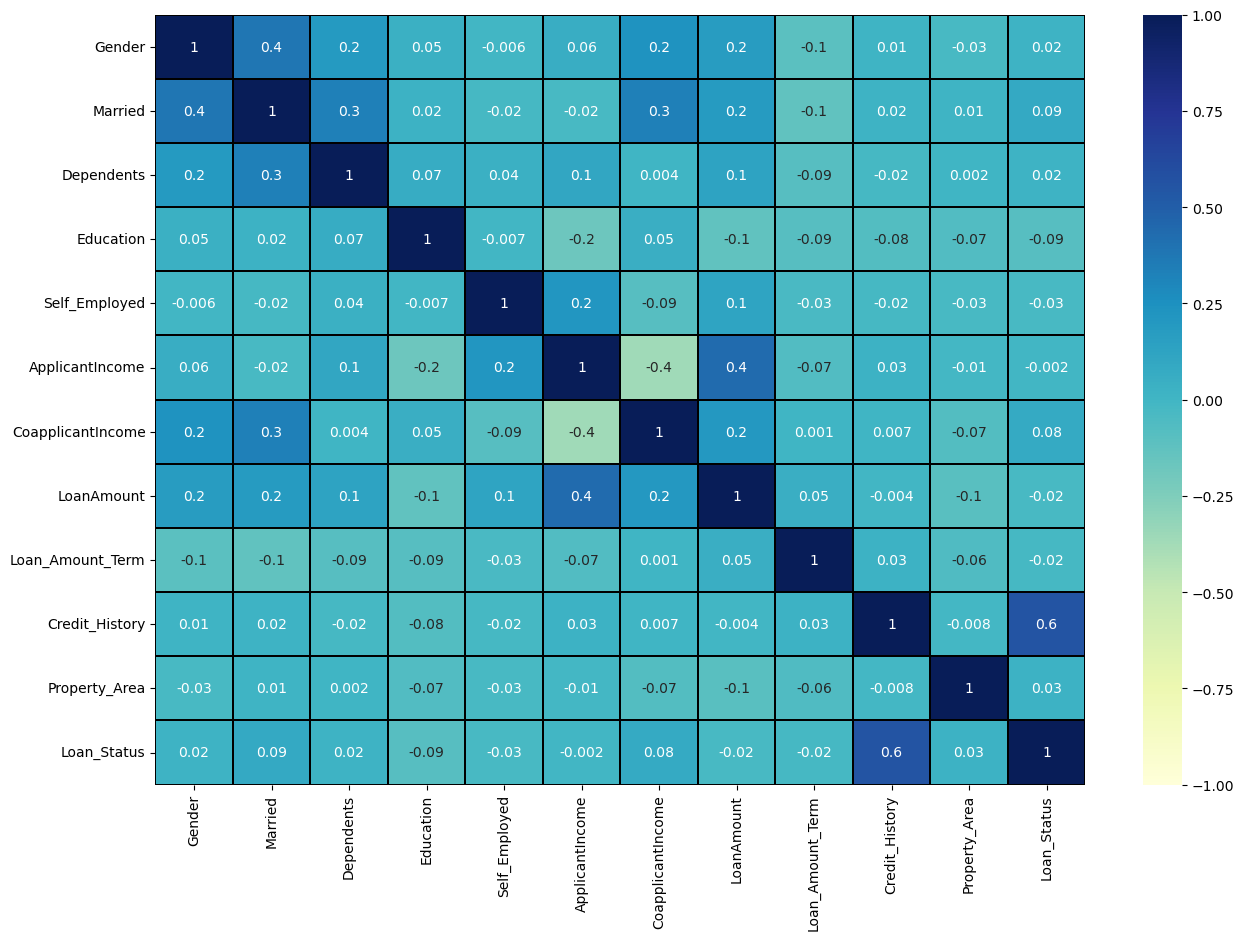

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)
# Loan_Status is highly positively correlated with the feature Credit_History

In [72]:
#Separating the features and label variables into x and y
x = new_df.drop("Loan_Status", axis=1)
y = new_df["Loan_Status"]

In [74]:
x.shape

(577, 11)

In [75]:
y.shape

(577,)

In [76]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [77]:
#target value is imbalanced, hence using SMOTE for balancing

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [78]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [79]:
new_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


In [80]:
#Modelling
#Finding the best random rate
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.891213389121339  on Random_state  29


In [81]:
#Creating Train_Test_Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [82]:
#Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)
print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

0.7196652719665272
[[ 65  61]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       126
           1       0.64      0.95      0.76       113

    accuracy                           0.72       239
   macro avg       0.78      0.73      0.71       239
weighted avg       0.78      0.72      0.71       239



In [83]:
#Getting an accuracy score of 71% with this model

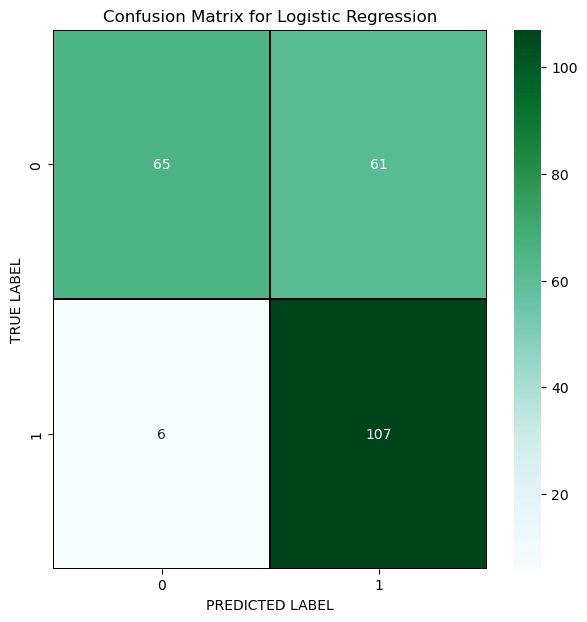

In [84]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [85]:
#Decission Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.803347280334728
[[105  21]
 [ 26  87]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       126
           1       0.81      0.77      0.79       113

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



In [86]:
#Got an accuracy score of 80% with this model

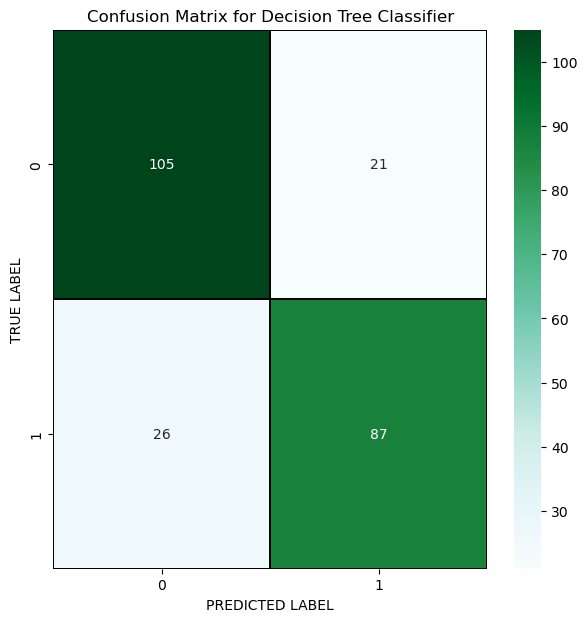

In [87]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [88]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8535564853556485
[[106  20]
 [ 15  98]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       126
           1       0.83      0.87      0.85       113

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



In [89]:
#Got an accuracy score of 85% with this model

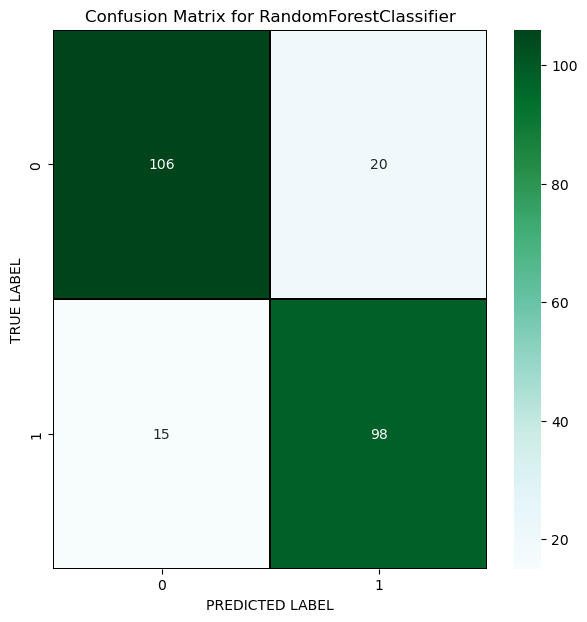

In [90]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [91]:
#KNeighbors Classifier
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7405857740585774
[[95 31]
 [31 82]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       126
           1       0.73      0.73      0.73       113

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



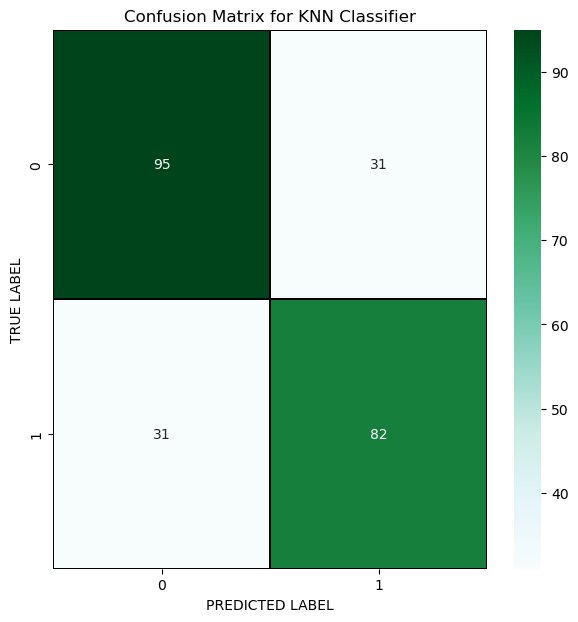

In [92]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [94]:
#Support Vector Machine Classifier
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7364016736401674
[[ 73  53]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       126
           1       0.66      0.91      0.77       113

    accuracy                           0.74       239
   macro avg       0.77      0.75      0.73       239
weighted avg       0.78      0.74      0.73       239



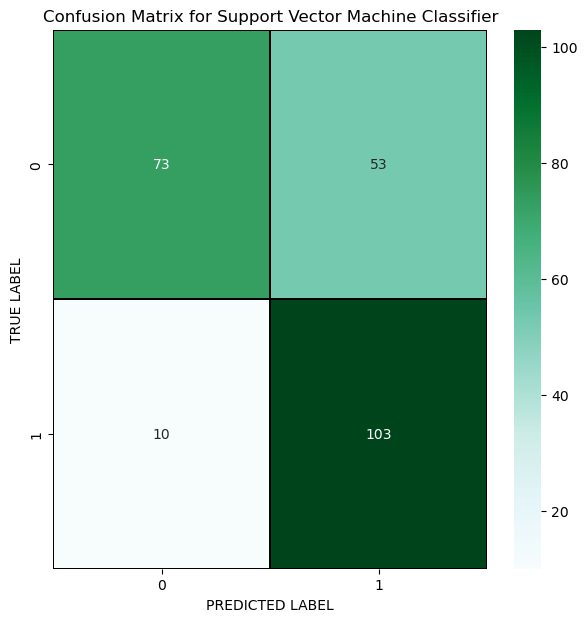

In [95]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [97]:
#Checking the Cross Validation Score
# cv score for Logistic Regression Classifier
print(cross_val_score(log,x,y,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())


0.6997641509433962
0.7814308176100628
0.8405503144654087
0.7386949685534592
0.7349449685534591


In [99]:
#Hyper Parameter Tuning
# Random Forest Classifier

parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}

In [103]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [105]:
GCV.best_params_


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'splitter': 'random'}

In [106]:
loan_status = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt',splitter='random')
loan_status.fit(x_train, y_train)
pred = loan_status.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.58995815899581


In [107]:
#accuracy score we got after hyperparametertuning is 78%

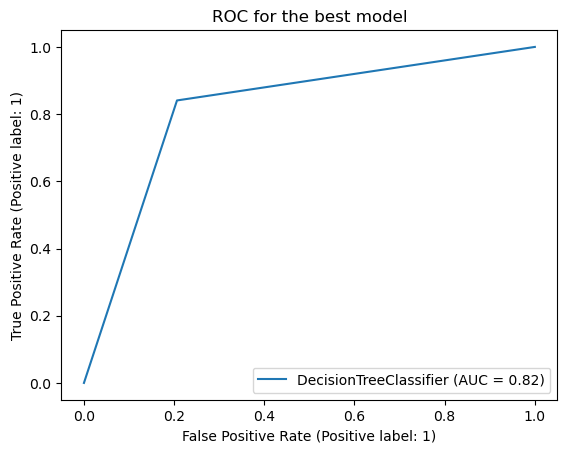

In [108]:
#Plotting AUC, ROC Curve
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(loan_status, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [109]:
#Saving The Model
import joblib
joblib.dump(loan_status,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']